# A few tips to get started with homework 2

### Manual pier data

For this homework we are going to use the library [Pandas](https://pandas.pydata.org/docs/index.html), which is great for dealing with all sorts of tabular data. Pandas can read the data straight from the [Shore Stations website](https://shorestations.ucsd.edu). Here we will use that data, not the data that is posted on Canvas. If you wanna have the file in your computer, you can run on your terminal

`wget -c --no-check-certificate https://shorestations.ucsd.edu/wp-content/uploads/sites/366/2020/03/RazTS_SURF.csv`

and move the file a directory of your choice

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

You can also read it directly from the website, but sometimes the Shore Stations server is down, so don't worry if this doesn't work, just wait and try again.

In [2]:
df = pd.read_csv('https://shorestations.ucsd.edu/wp-content/uploads/sites/366/2020/03/RazTS_SURF.csv')

Pandas will read the data into an object called a `dataframe`, which is basically a table. Let's take a look at the dataframe 

In [3]:
df.head() # "head()" here is just so it only shows the first couple of lines (you could also do "tail()")

,Unnamed: 0,SFCtime,TSFCadj,TSFCraw
0,1,1916-08-22 08:00:01,19.839066,19.5
1,2,1916-08-23 08:00:01,20.239066,19.9
2,3,1916-08-24 08:00:01,20.039066,19.7
3,4,1916-08-25 08:00:01,20.039066,19.7
4,5,1916-08-26 08:00:01,19.839066,19.5


We can look at the keys from the dataframe, or the "labels"

In [4]:
df.keys()

Index(['Unnamed: 0', 'SFCtime', 'TSFCadj', 'TSFCraw'], dtype='object')

It looks like there is a column that we don't really need, called 'Unnamed: 0', so we can get rid of it. 

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,SFCtime,TSFCadj,TSFCraw
0,1916-08-22 08:00:01,19.839066,19.5
1,1916-08-23 08:00:01,20.239066,19.9
2,1916-08-24 08:00:01,20.039066,19.7
3,1916-08-25 08:00:01,20.039066,19.7
4,1916-08-26 08:00:01,19.839066,19.5


We can take a quick look at the data plotting strait from the panda da

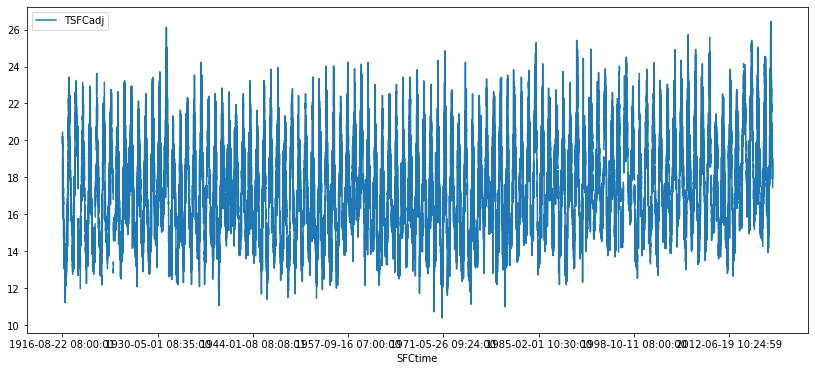

In [6]:
df.plot(x ='SFCtime', y ='TSFCadj', figsize=(14, 6) )

Now, let's look at one specific element from the column 'SFCtime'

In [7]:
df['SFCtime'][0]

'1916-08-22 08:00:01'

we see that the time is saved as a string, and this is why the x label in the plot above looks weird. It would be nice to have the time saved as a [datetime](https://docs.python.org/3/library/datetime.html) object so it would be easier to handle. Here, we will replace the value in the column 'SFCtime' to datetime obsjetc. Pandas is smart enough to make the convertion automatically using the function [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

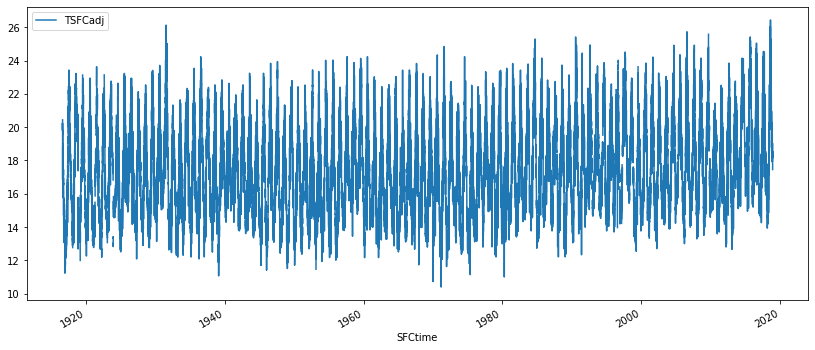

In [8]:
df['SFCtime'] = pd.to_datetime(df['SFCtime'])
df.plot(x ='SFCtime', y ='TSFCadj', figsize=(14, 6) )

In [9]:
df['SFCtime'][0]

Timestamp('1916-08-22 08:00:01')

Nice! now our times are actual time stamps.

### Automatic data

In [10]:
import xarray as xr
import numpy as np
import glob

In [11]:
auto_files = sorted(glob.glob('data/SCCOOS/*.nc'))

In [12]:
auto_temp = xr.open_dataset(auto_files[0]).temperature
for f in auto_files[1:]:
    print('reading file {}'.format(f))
    auto_temp = xr.concat([auto_temp, xr.open_dataset(f).temperature], dim='time')    

reading file data/SCCOOS/scripps_pier-2006.nc
reading file data/SCCOOS/scripps_pier-2007.nc
reading file data/SCCOOS/scripps_pier-2008.nc
reading file data/SCCOOS/scripps_pier-2009.nc
reading file data/SCCOOS/scripps_pier-2010.nc
reading file data/SCCOOS/scripps_pier-2011.nc
reading file data/SCCOOS/scripps_pier-2012.nc
reading file data/SCCOOS/scripps_pier-2013.nc
reading file data/SCCOOS/scripps_pier-2014.nc
reading file data/SCCOOS/scripps_pier-2015.nc
reading file data/SCCOOS/scripps_pier-2016.nc
reading file data/SCCOOS/scripps_pier-2017.nc
reading file data/SCCOOS/scripps_pier-2018.nc
reading file data/SCCOOS/scripps_pier-2019.nc
reading file data/SCCOOS/scripps_pier-2020.nc


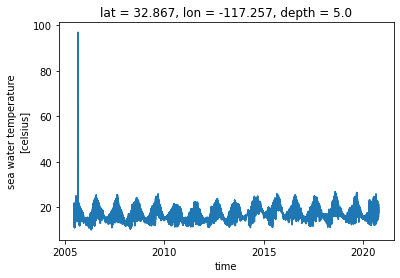

In [13]:
auto_temp.plot()

In [14]:
# Taking care of that little bad value there
auto_temp[auto_temp>40] = np.nan

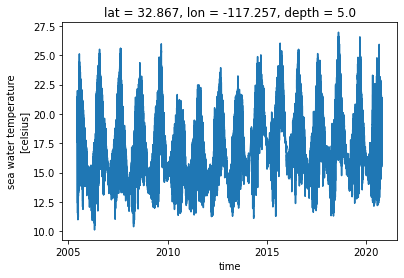

In [15]:
auto_temp.plot()

/Users/SWC/opt/anaconda3/envs/SIO221A/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


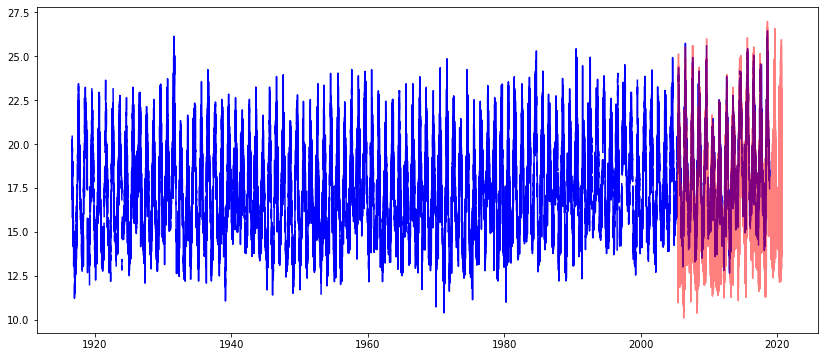

In [16]:
# I can explain this in the discussion session. But basically we need to do a trick to get the dates
# from the two files to have the sabe format so they can be plotted on the same plot.
# This is again because the SCCOOS data is not properly formatted. 
plt.figure(figsize=(14, 6))
plt.plot(df['SFCtime'], df['TSFCadj'], 'b')
plt.plot(auto_temp.indexes['time'].to_datetimeindex(), auto_temp, 'r', alpha=0.5)

### Now, to subsample the data

In [17]:
# example of how to select specific time stamps/ranges
# ind = (auto_temp.time.dt.hour == 8) & (auto_temp.time.dt.year == 2007)

In [18]:
auto_temp

<xarray.DataArray 'temperature' (time: 1639986)>
array([20.2814, 20.3125, 20.3357, ..., 21.1062, 21.1074, 21.1049],
      dtype=float32)
Coordinates:
  * time     (time) object 2005-06-16 19:28:47 ... 2020-10-10 01:33:35
    lat      float32 32.867
    lon      float32 -117.257
    depth    float32 5.0
Attributes:
    platform:       platform1
    long_name:      sea water temperature
    standard_name:  sea_water_temperature
    instrument:     instrument1
    units:          celsius
    ncei_name:      WATER TEMPERATURE
    source:         insitu observations
    cell_methods:   time: point
    references:     http://sccoos.org/data/autoss/, http://sccoos.org/about/d...
    grid_mapping:   crs
    comment:        The following QC tests were done on temperature: Range Ch...
    valid_min:      -5.0
    valid_max:      30.0
    data_max:       97.0
    data_min:       10.9709

In [19]:
# this will make hourly averages of the automatic data
temp_hourly = auto_temp.resample(time='1H').mean()

In [20]:
temp_hourly.time

<xarray.DataArray 'time' (time: 134263)>
array([cftime.DatetimeJulian(2005, 6, 16, 19, 0, 0, 0),
       cftime.DatetimeJulian(2005, 6, 16, 20, 0, 0, 0),
       cftime.DatetimeJulian(2005, 6, 16, 21, 0, 0, 0), ...,
       cftime.DatetimeJulian(2020, 10, 9, 23, 0, 0, 0),
       cftime.DatetimeJulian(2020, 10, 10, 0, 0, 0, 0),
       cftime.DatetimeJulian(2020, 10, 10, 1, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2005-06-16 19:00:00 ... 2020-10-10 01:00:00
    lat      float32 32.867
    lon      float32 -117.257
    depth    float32 5.0

In [21]:
# Now, we want to get only measurements at 8:00am
temp_subsample = temp_hourly[temp_hourly.time.dt.hour==8]

In [22]:
temp_subsample.time

<xarray.DataArray 'time' (time: 5594)>
array([cftime.DatetimeJulian(2005, 6, 17, 8, 0, 0, 0),
       cftime.DatetimeJulian(2005, 6, 18, 8, 0, 0, 0),
       cftime.DatetimeJulian(2005, 6, 19, 8, 0, 0, 0), ...,
       cftime.DatetimeJulian(2020, 10, 7, 8, 0, 0, 0),
       cftime.DatetimeJulian(2020, 10, 8, 8, 0, 0, 0),
       cftime.DatetimeJulian(2020, 10, 9, 8, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2005-06-17 08:00:00 ... 2020-10-09 08:00:00
    lat      float32 32.867
    lon      float32 -117.257
    depth    float32 5.0

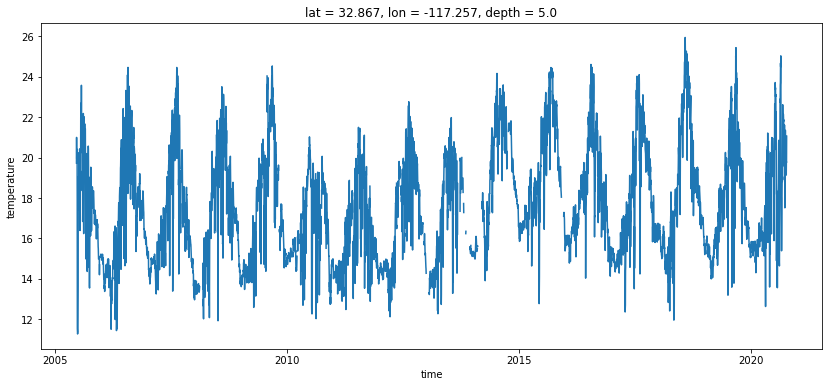

In [23]:
temp_subsample.plot(figsize=(14, 6))

In [24]:
indm = df['SFCtime'].dt.year >= 2005

/Users/SWC/opt/anaconda3/envs/SIO221A/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


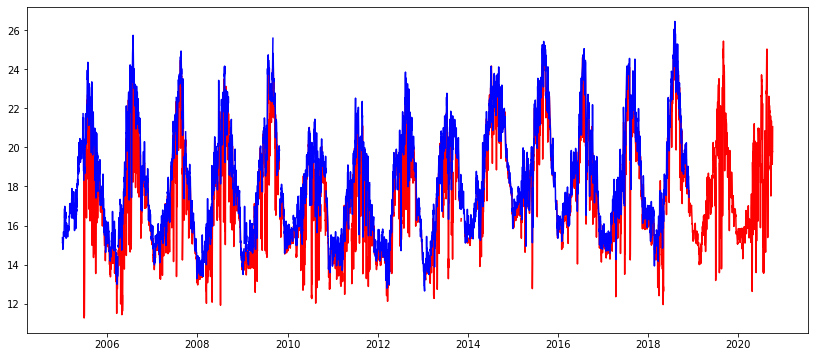

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(temp_subsample.indexes['time'].to_datetimeindex(), temp_subsample, 'r')
plt.plot(df['SFCtime'][indm], df['TSFCadj'][indm], 'b')